<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/pre_pro_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv('/content/train_loan_preprocess (1).csv')

In [ ]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

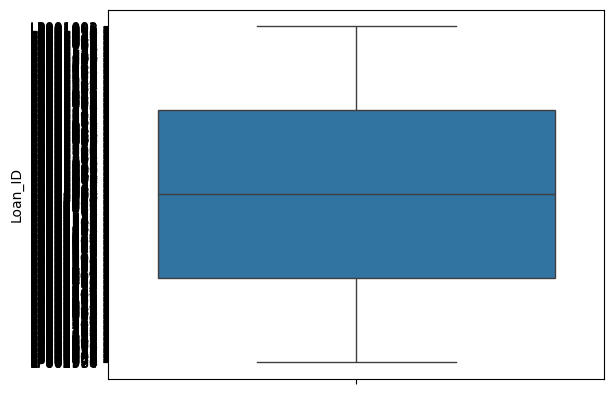

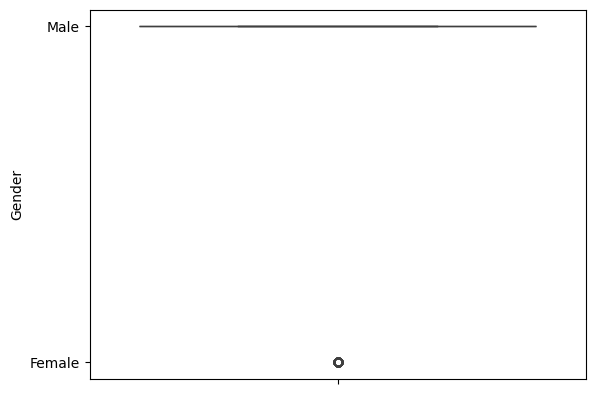

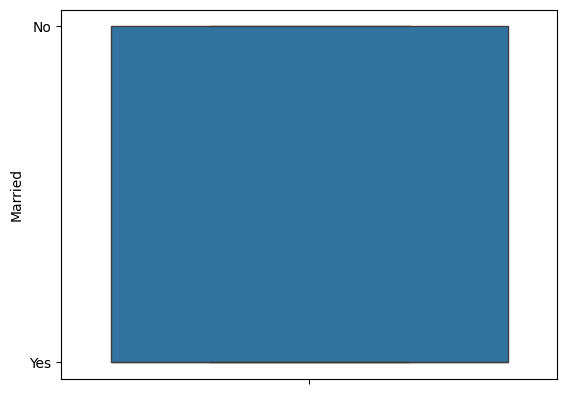

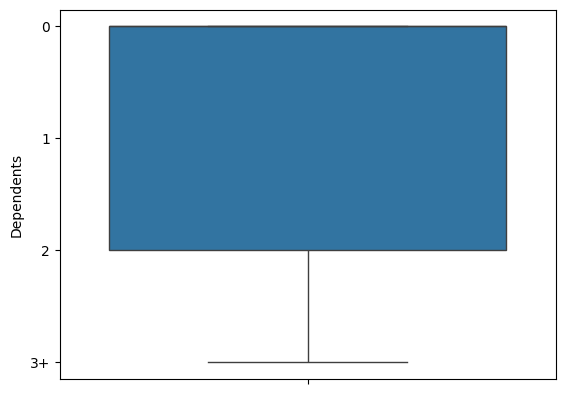

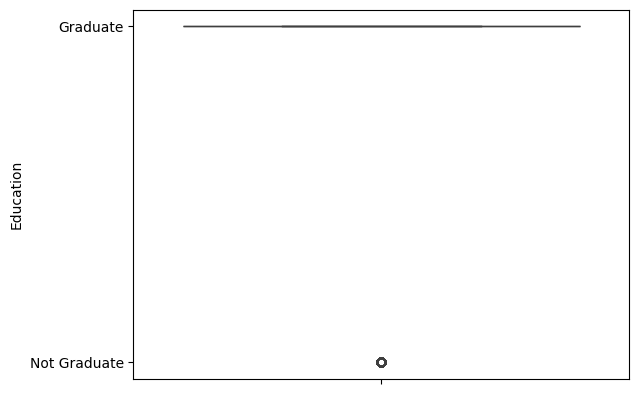

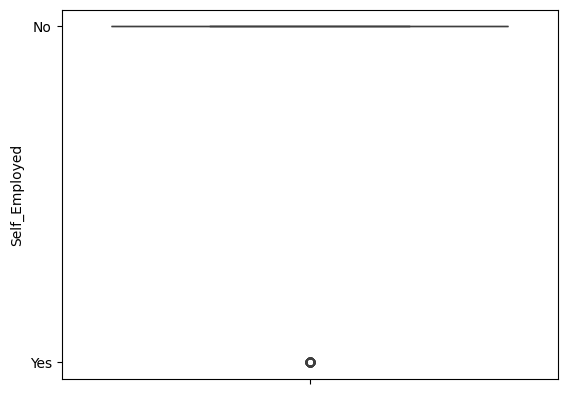

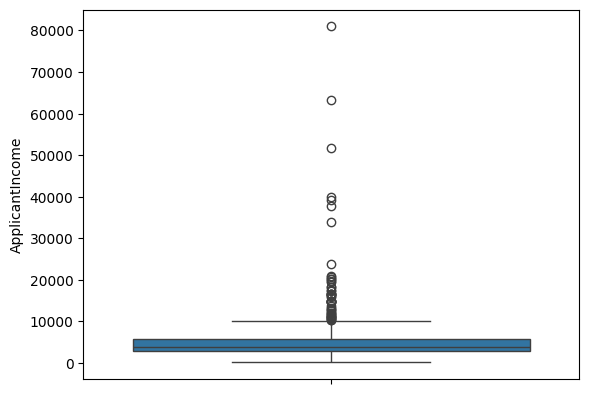

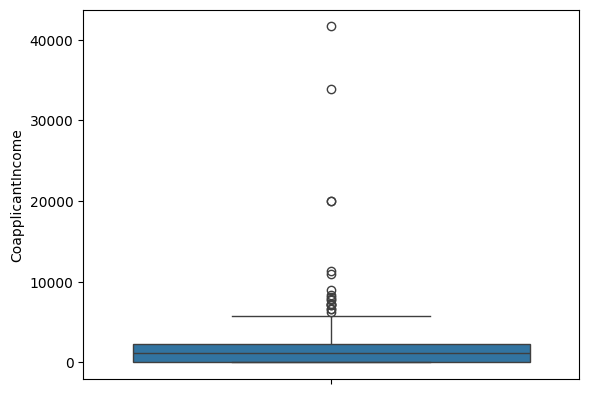

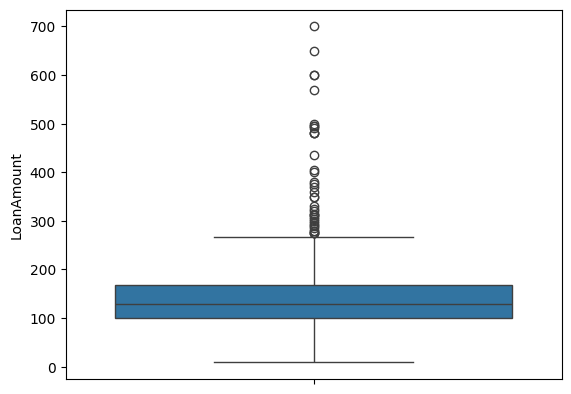

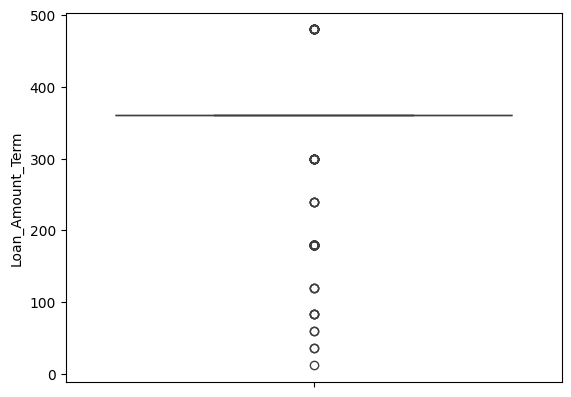

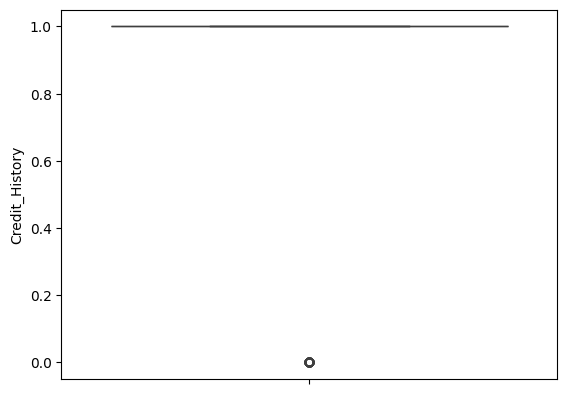

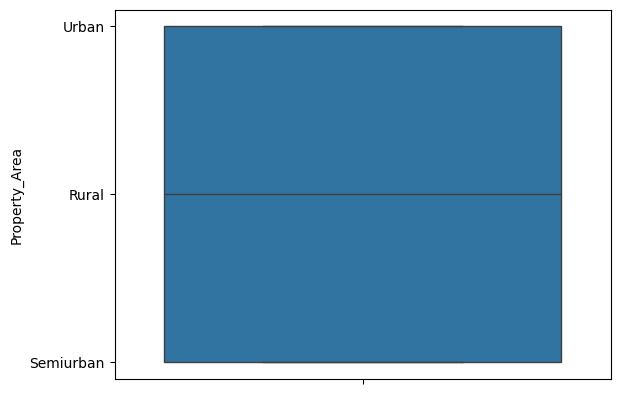

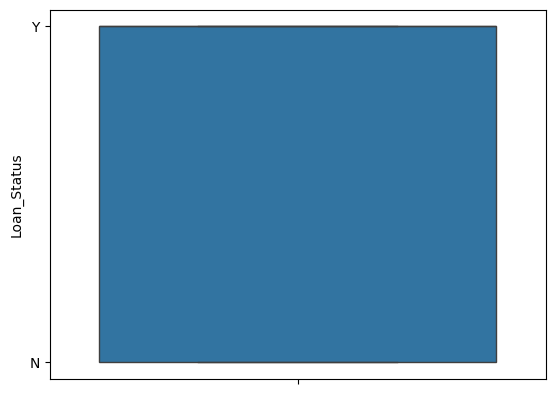

In [ ]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
null_columns = df.columns[df.isnull().any()]
print(null_columns)


Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [6]:
for column in null_columns:
  if df[column].dtype in ['int64', 'float64']:
    df[column].fillna(df[column].median(), inplace=True)

df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [7]:
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_columns = df[null_columns].select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df[null_columns].select_dtypes(exclude=['int64', 'float64']).columns
numeric_imputer.fit(df[numeric_columns])
df[numeric_columns] = numeric_imputer.transform(df[numeric_columns])
if len(categorical_columns) > 0:
    categorical_imputer.fit(df[categorical_columns])
    df[categorical_columns] = categorical_imputer.transform(df[categorical_columns])
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


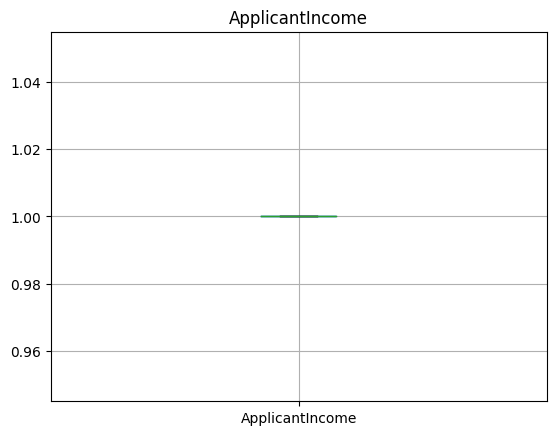

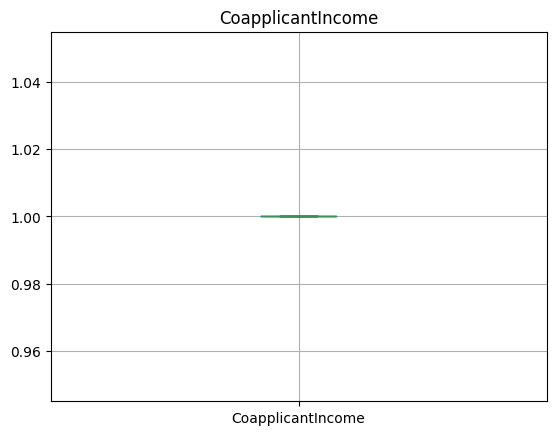

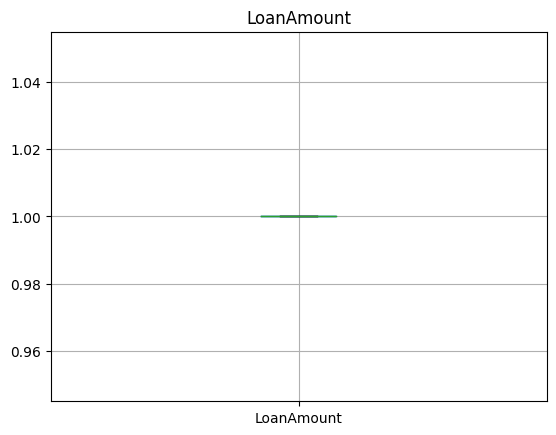

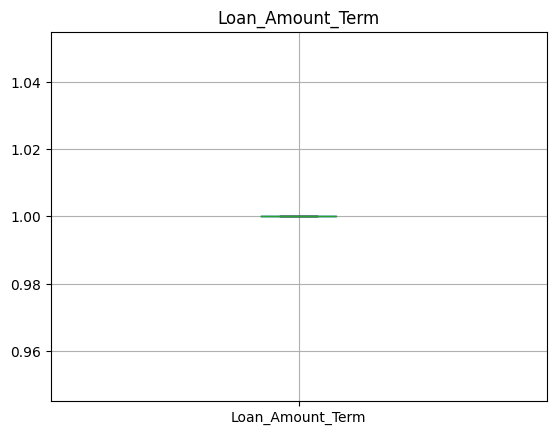

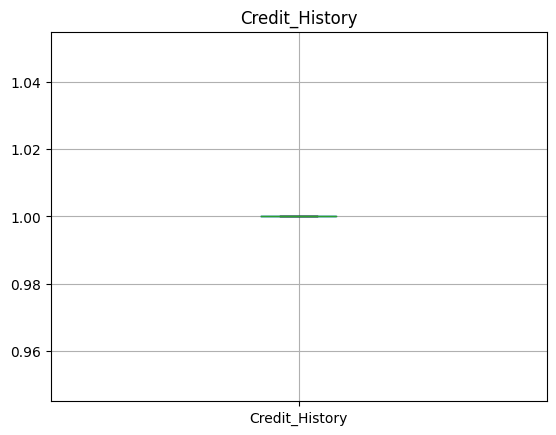

In [13]:
for column in df.select_dtypes(include=['number']):
    plt.figure()
    df.boxplot([column])
    plt.title(column)

In [10]:
outlier_col=[]
for column in df.select_dtypes(include=['number']):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in ApplicantIncome: 50
Number of outliers in CoapplicantIncome: 18
Number of outliers in LoanAmount: 41
Number of outliers in Loan_Amount_Term: 88
Number of outliers in Credit_History: 89
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [11]:
for column in outlier_col:
   df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)

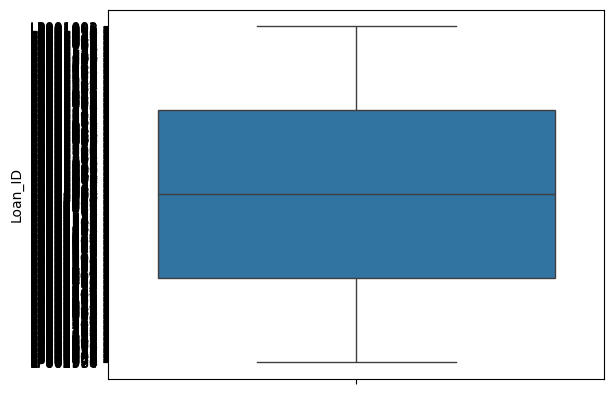

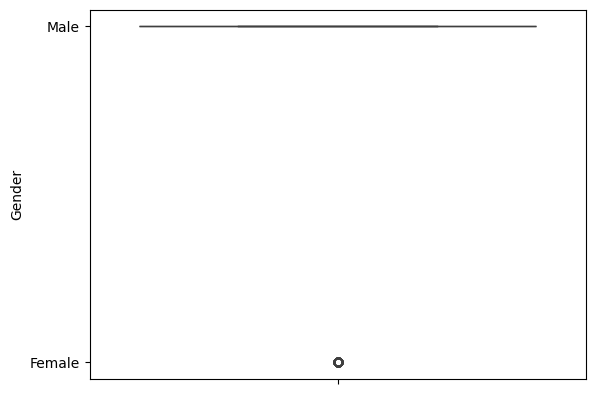

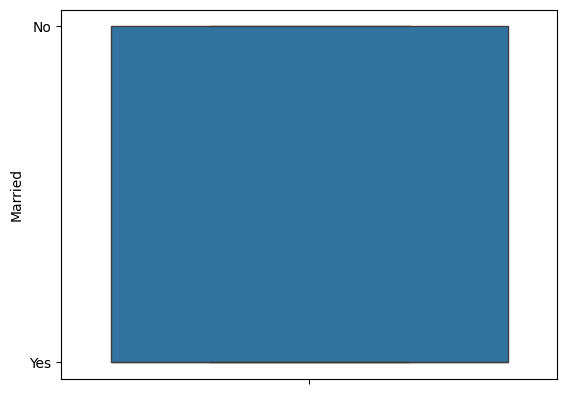

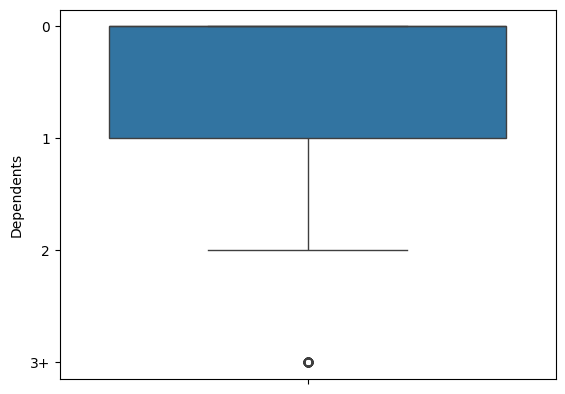

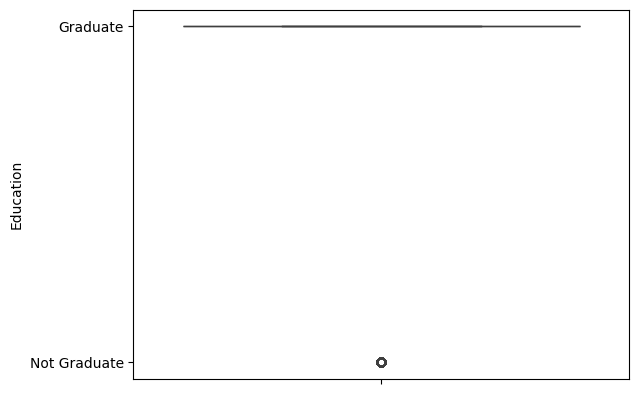

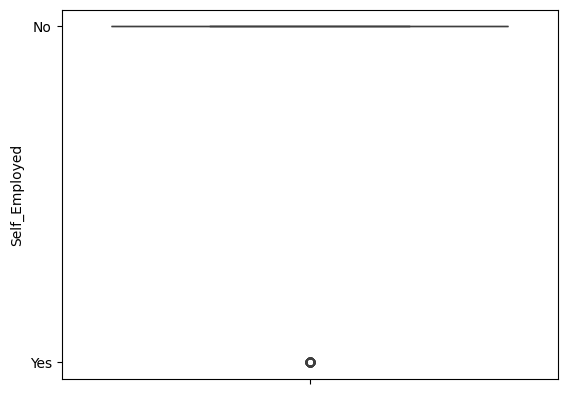

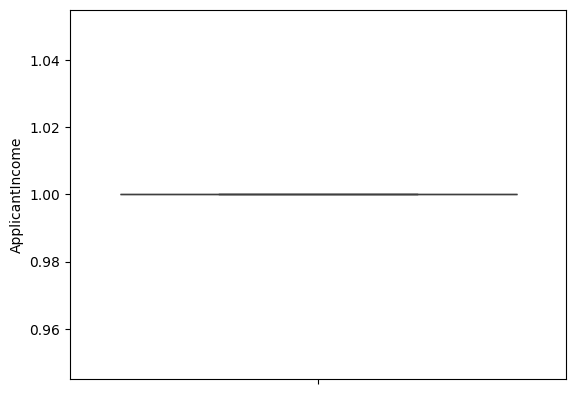

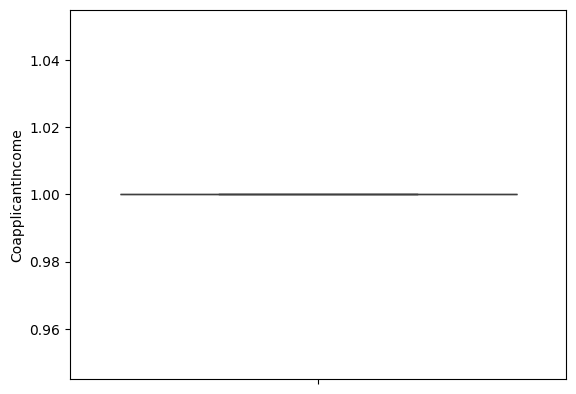

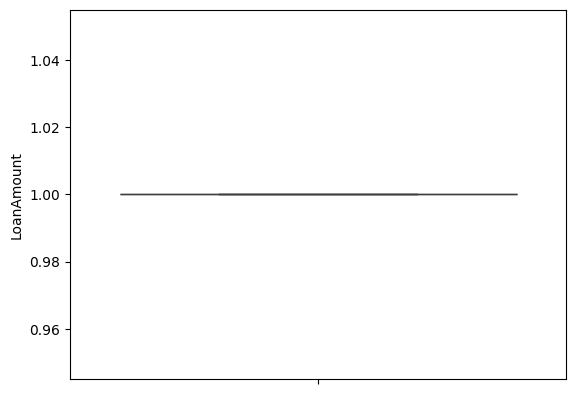

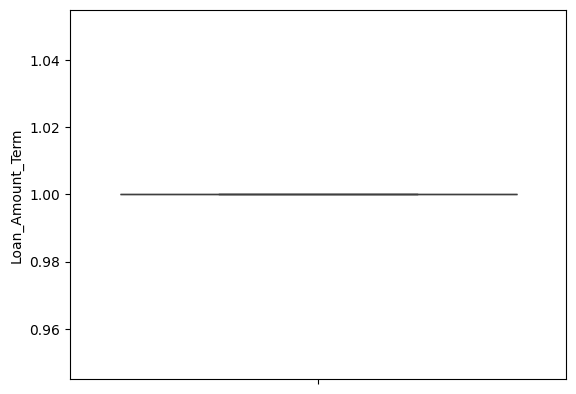

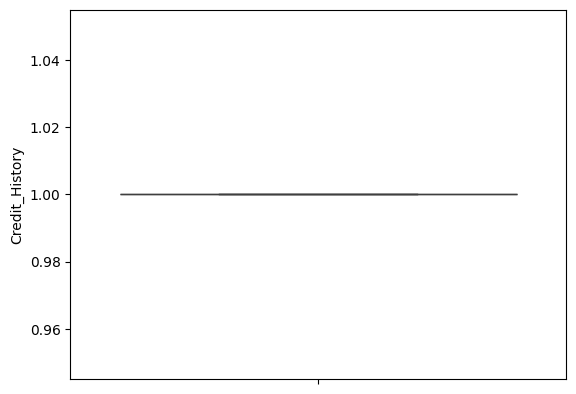

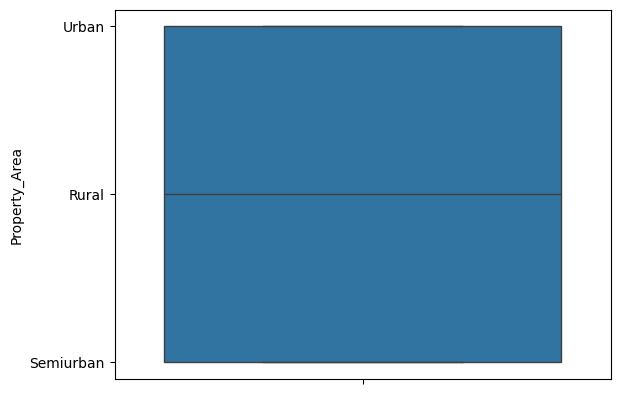

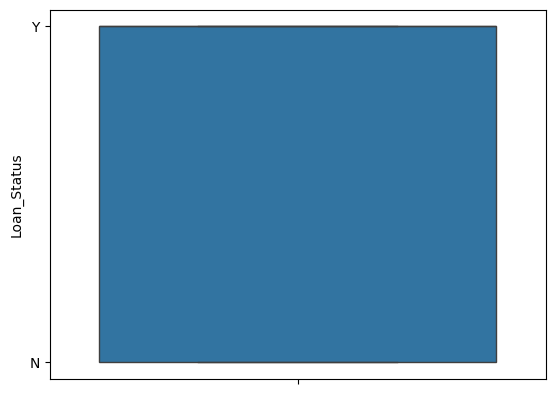

In [12]:
for column in df.columns:
  sns.boxplot(df[column])
  plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1,1.0,1.0,1.0,1.0,2,1
1,1,1,1,1,0,0,1,1.0,1.0,1.0,1.0,0,0
2,2,1,1,0,0,1,1,1.0,1.0,1.0,1.0,2,1
3,3,1,1,0,1,0,1,1.0,1.0,1.0,1.0,2,1
4,4,1,0,0,0,0,1,1.0,1.0,1.0,1.0,2,1


In [15]:
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.0,0.0,0.0,0.0,0.0,1.223298,0.674519
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.0,0.0,0.0,0.0,0.0,-1.318513,-1.482537
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,0.0,0.0,0.0,0.0,0.0,1.223298,0.674519
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,0.0,0.0,0.0,0.0,0.0,1.223298,0.674519
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.0,0.0,0.0,0.0,0.0,1.223298,0.674519
